In [21]:
import os
from shapely.geometry import Point, Polygon, MultiPolygon
from datetime import datetime
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import sqlite3 as sl
import matplotlib.pyplot as plt
import requests

from dotenv import load_dotenv
load_dotenv()

import logging
logging.getLogger().setLevel(logging.INFO) # DEBUG, INFO or WARN

DROOT = '../1-data/'
TRANSITLAND_KEY = os.environ['TRANSITLAND_KEY']

# Transitland Tests

`url = 'https://transit.land/api/v2/rest/feeds'` doesn't work, doesn't filter correctly on distance


In [22]:
url = 'https://transit.land/api/v2/rest/agencies'
params = {
    "lat": 52.785071,
    "lon": 4.804538,
    "radius": 10000,
    "apikey": TRANSITLAND_KEY
}

response = requests.get(url, params=params)
res = response.json()

feeds = [agency['feed_version'] for agency in res['agencies']]
feed_ids = [feed['feed']['onestop_id'] for feed in feeds]
feed_ids = list(set(feed_ids))
print(feed_ids)

for feed_id in feed_ids:
    print(feed_id)
    feed = f"https://transit.land/api/v2/rest/feeds/{feed_id}/download_latest_feed_version"
    params = {"apikey": TRANSITLAND_KEY}
    response = requests.get(feed, params=params)
    
    gtfs_out = os.path.join(DROOT, '2-gh', 'gtfs', f'{feed_id}.gtfs.zip')
    with open(gtfs_out, 'wb') as f:
        f.write(response.content)

['f-u-flixbus', 'f-germany~urban~transport', 'f-u-nl']
f-u-flixbus
f-germany~urban~transport
f-u-nl


In [4]:
#Import the gtfs-kit module
import os
import gtfs_kit as gk

#Declare the directory path for the GTFS zip file
# path = os.path.join(gtfs_out)
path = os.path.join('../1-data/2-gtfs/out/2167-20230822-20230822-f-u-nl.gtfs.zip')

#Read the feed with gtfs-kit
feed = (gk.read_feed(path, dist_units='km'))

#Search for errors and warnings in the feed
feed.validate()

,type,message,table,rows
0,warning,Unrecognized column feed_id,feed_info,[]
2,warning,Unrecognized column fare_units_traveled,stop_times,[]
3,warning,"Repeated pair (trip_id, departure_time)",stop_times,"[217655, 157571, 157577, 207721, 187486, 16749..."
1,warning,Unrecognized column platform_code,stops,[]
4,warning,Unrecognized column from_route_id,transfers,[]
5,warning,Unrecognized column to_route_id,transfers,[]
6,warning,Unrecognized column from_trip_id,transfers,[]
7,warning,Unrecognized column to_trip_id,transfers,[]
8,warning,Unrecognized column realtime_trip_id,trips,[]
9,warning,Unrecognized column trip_long_name,trips,[]


In [5]:
feed.stops

,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code,zone_id
0,2338183,50000120,"Utrecht, CS Jaarbeurszijde",52.089213,5.108631,0,stoparea:368578,NaN,1.0,C1,NaN
1,2338187,50000128,"Utrecht, CS Jaarbeurszijde",52.087572,5.110086,0,stoparea:368578,NaN,1.0,C9,NaN
2,2339836,59150370,"Utrecht, Marnixlaan",52.105741,5.093158,0,stoparea:368297,NaN,0.0,D,NaN
3,2338197,50000781,"Utrecht, Moskeeplein",52.092027,5.104951,0,stoparea:368573,NaN,0.0,NaN,NaN
4,2338198,50000790,"Utrecht, Hasebroekstraat",52.093365,5.097296,0,stoparea:368576,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20281,stoparea:400802,NaN,"Woldendorp, Dollard College",53.274055,7.030731,1,NaN,NaN,0.0,NaN,NaN
20282,stoparea:400803,NaN,"Woldendorp, Zwaagweg",53.273220,7.028308,1,NaN,NaN,0.0,NaN,NaN
20283,stoparea:400804,NaN,"Westerlee, Tonkensoordlaan",53.136661,6.955037,1,NaN,NaN,0.0,NaN,NaN
20284,stoparea:400805,NaN,"Wachtum, Rieweg",52.720366,6.737412,1,NaN,NaN,0.0,NaN,NaN


In [48]:
#Import the gtfs-kit module
import os
import gtfs_kit as gk

#Declare the directory path for the GTFS zip file
# path = os.path.join(gtfs_out)
path = os.path.join('../1-data/2-gtfs/out/2051-20230912-20230912-f-fgc~cat.gtfs.zip')

#Read the feed with gtfs-kit
feed = (gk.read_feed(path, dist_units='km'))

#Search for errors and warnings in the feed
feed.validate()

,type,message,table,rows
3,error,Invalid stop_id; maybe has extra space characters,stops,[32]
0,warning,Unrecognized column feed_contact_url,feed_info,[]
1,warning,Unrecognized column feed_contact_email,feed_info,[]
2,warning,Unrecognized column default_lang,feed_info,[]


In [45]:
feed.routes

,route_long_name,route_short_name,agency_id,route_type,route_id
0,N1135,N1135,212,3,14241
1,N1720,N1720,212,3,10617
2,N710,N710,212,3,1201
3,N872,N872,212,3,16005


In [46]:
feed.get_stops(route_ids=['14241'])

,stop_name,parent_station,stop_id,stop_lat,stop_lon,location_type
10089,Avignon (Le Pontet),391913,577901,43.960625,4.855938,NaN
16298,Barcelona (Bus Terminal Nord),399472,501431,41.394180,2.182959,NaN
67276,Freiburg (im Breisgau) central station,67416,354381,47.995690,7.840469,NaN
136305,Lyon Perrache (Central Bus Station - Galerie D),282993,471318,45.749275,4.827632,NaN
147369,Montpellier (Sabines),30241,149967,43.583930,3.860233,NaN
148079,Mulhouse (bus station),394991,139228,47.742878,7.342869,NaN
161422,Nîmes (P+R Parnasse ),644935,188622,43.817432,4.362175,NaN
172620,Perpignan (Central Bus station),77494,519364,42.695023,2.879074,NaN
208751,Strasbourg,102523,257433,48.574180,7.754266,NaN


# Other stuff

In [35]:
# Filter features.
features = feed.shapes_to_geojson()
feed_shapes = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")
feed_shapes.head(3)

,geometry,shape_id
0,"LINESTRING (6.65565 52.35760, 6.65581 52.35744...",1001732
1,"LINESTRING (6.52693 52.11702, 6.52691 52.11702...",1001733
2,"LINESTRING (6.89521 52.21744, 6.89601 52.21742...",1001736
3,"LINESTRING (6.65580 52.35756, 6.65597 52.35740...",1001747
4,"LINESTRING (5.18115 52.22613, 5.18109 52.22619...",1003862
...,...,...
5846,"LINESTRING (5.39228 51.87286, 5.39233 51.87283...",995662
5847,"LINESTRING (6.90083 52.20787, 6.90078 52.20855...",995773
5848,"LINESTRING (6.65580 52.35756, 6.65597 52.35740...",995779
5849,"LINESTRING (4.47189 51.55424, 4.47195 51.55424...",995914


'Rows n=958 out of 5851 kept.'

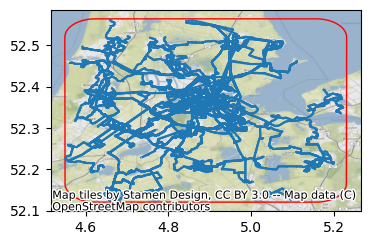

In [87]:
# Build Bounding Box for focus area
bbox = [(4.62314, 52.51905), (5.15805, 52.16525)]
bbox = Polygon([bbox[0], (bbox[0][0], bbox[1][1]), bbox[1], (bbox[1][0], bbox[0][1])])
bbox = gpd.GeoSeries(data=[bbox], crs="EPSG:4326")
bbox = bbox.to_crs(bbox.estimate_utm_crs()).buffer(5000).to_crs(bbox.crs)

# Plot both box and shapes within the bounding box.
fig, ax = plt.subplots(figsize=(4,4))
bbox.plot(edgecolor='red', facecolor='none', ax=ax)
feed_shapes[feed_shapes.within(bbox.iloc[0])].plot(ax=ax)
ctx.add_basemap(ax=ax, crs=feed_shapes.crs)

f"Rows n={feed_shapes.intersects(bbox.iloc[0]).sum()} out of {feed_shapes.shape[0]} kept."

wew
(916, 2)


,geometry,shape_id
0,"LINESTRING (5.18115 52.22613, 5.18109 52.22619...",1003862
1,"LINESTRING (4.88936 52.33611, 4.88945 52.33610...",1005038
2,"LINESTRING (4.95085 52.36522, 4.95069 52.36519...",1005042


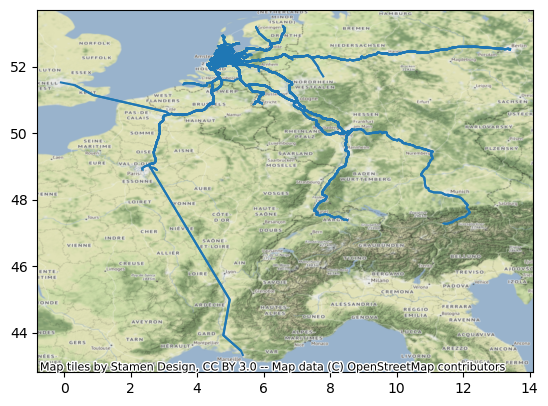

In [94]:
bbox = [(4.62314, 52.51905), (5.15805, 52.16525)]
bbox = Polygon([bbox[0], (bbox[0][0], bbox[1][1]), bbox[1], (bbox[1][0], bbox[0][1])])
bbox = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")
bbox.geometry = bbox.to_crs(bbox.estimate_utm_crs()).buffer(5000).to_crs(bbox.crs)

newfeed = feed.restrict_to_area(bbox)
print('wew')

newfeatures = newfeed.shapes_to_geojson()
new_feed_shapes = gpd.GeoDataFrame.from_features(newfeatures, crs="EPSG:4326")
print(new_feed_shapes.shape)

ax = new_feed_shapes.plot()
ctx.add_basemap(ax=ax, crs=feed_shapes.crs)
new_feed_shapes.head(3)

In [95]:
newfeed.write('./newgtfs.zip')